In [84]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy import stats
from sklearn import datasets, linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 


def VIF(df, columns): 
    values=sm.add_constant(df[columns]).values
    # the dataframe passed to VIF␣ ↪ must include the intercept term. We add it the same way we did before. 
    num_columns=len(columns)+1#we added intercept 
    vif=[variance_inflation_factor(values, i) for i in range(num_columns)] 
    return pd.Series(vif[1:], index=columns)
def OSR2(model, y_train, x_test,y_test):
    y_pred=model.predict(x_test) 
    SSE=np.sum((y_test-y_pred)**2) 
    SST=np.sum((y_test-np.mean(y_train))**2) 
    return 1-(SSE/SST)

In [85]:
training_data = pd.read_csv('../features_train.csv')
training_data.drop(columns=['since', 'until','Unnamed: 0'], inplace=True)
training_data = training_data.drop(0)
training_data['Previous Sentiment'] = training_data['Sentiment'].shift(1)
training_data = training_data[1:]

testing_data = pd.read_csv('../features_test.csv')
testing_data.drop(columns=['since', 'until','Unnamed: 0'], inplace=True)
testing_data['Previous Sentiment'] = testing_data['Sentiment'].shift(1)
print(testing_data)
testing_data = testing_data[1:]
X_train = training_data.drop(columns=['Tesla Stock Price'])
y_train = training_data['Tesla Stock Price']
X_test = testing_data.drop(columns=['Tesla Stock Price'])
y_test = testing_data['Tesla Stock Price']
#use only the important features
features =X_train.columns
X_train.head()




    Tesla Stock Price  S&P 500 Variance  Ford Stock Price  GM Stock Price  \
0           33.525466       1090.382305          9.258000       34.902001   
1           35.679167        991.539720          9.175000       35.262500   
2           38.820533       1177.017305          8.912000       33.658000   
3           51.983867        952.388795          8.566000       34.216000   
4           52.226400       1357.345395          8.150000       34.960000   
..                ...               ...               ...             ...   
59         234.918665       4137.348271         11.998000       57.904000   
60         224.356668       1138.260281         11.642000       57.556001   
61         199.837335        911.892071         11.602000       55.499999   
62         194.362003       1386.493858         12.626000       56.049999   
63         208.355555       1446.851184         14.436666       59.053335   

    Toyota Stock Price  Nissan Stock Price  Tesla Wikipedia Page Views  \
0

,S&P 500 Variance,Ford Stock Price,GM Stock Price,Toyota Stock Price,Nissan Stock Price,Tesla Wikipedia Page Views,Sentiment,Previous Week Tesla Stock Price,Previous Sentiment
2,9178.074048,12.914,34.189999,70.372000,14.840,1449.4,0.089603,1.372800,0.018235
3,435.732436,13.040,34.189999,72.763998,15.460,1102.2,0.140323,1.384800,0.089603
4,380.825787,12.560,34.189999,70.756001,15.062,898.0,0.040080,1.388933,0.140323
5,316.106150,12.002,34.189999,70.690001,15.200,801.0,0.188023,1.232667,0.040080
6,591.345328,11.328,34.189999,69.030000,14.992,766.2,0.168206,1.261200,0.188023


In [86]:
#Now we want to see how the model behaves. We train the linear regression.
#We will mostly focus on the p-values, the VIF values, and R2.
X=X_train
Y=y_train
X2 = sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, features))

pd.set_option('display.max_colwidth', None) 



                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4206.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:                -516.75
No. Observations:                 432   AIC:                             1053.
Df Residuals:                     422   BIC:                             1094.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [87]:
#We see that the p-values are very high for some features, we should eliminate them.
#We eliminate Tesla Wikipedia, since it has a very high p-value as well as a high VIF value.
X_train = X_train.drop(columns=['Tesla Wikipedia Page Views'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))



                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4743.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:                -516.75
No. Observations:                 432   AIC:                             1051.
Df Residuals:                     423   BIC:                             1088.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [88]:
#Now we eliminate Nissan stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['Nissan Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))


                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     5433.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:                -516.76
No. Observations:                 432   AIC:                             1050.
Df Residuals:                     424   BIC:                             1082.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [89]:
#Now we eliminate  SP500 Variance , since it has a very high p-value
X_train = X_train.drop(columns=['S&P 500 Variance'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6353.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                -516.79
No. Observations:                 432   AIC:                             1048.
Df Residuals:                     425   BIC:                             1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [90]:
#Now we eliminate Sentiment scores, since it has a very high p-value
X_train = X_train.drop(columns=['Sentiment'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     7624.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                -517.26
No. Observations:                 432   AIC:                             1047.
Df Residuals:                     426   BIC:                             1071.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [91]:
#Now we eliminate GM stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['GM Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9510.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                -518.22
No. Observations:                 432   AIC:                             1046.
Df Residuals:                     427   BIC:                             1067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [92]:
#Now we eliminate Ford stock prices, since it has a very high p-value
X_train = X_train.drop(columns=['Ford Stock Price'])
X=X_train
X2=sm.add_constant(X)
lrm=sm.OLS(Y, X2).fit()
print(lrm.summary())
print(VIF(training_data, X_train.columns))

                            OLS Regression Results                            
Dep. Variable:      Tesla Stock Price   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:41   Log-Likelihood:                -518.78
No. Observations:                 432   AIC:                             1046.
Df Residuals:                     428   BIC:                             1062.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

   const  Toyota Stock Price  Previous Week Tesla Stock Price  \
1    1.0          141.020000                        33.525466   
2    1.0          141.806000                        35.679167   
3    1.0          141.556000                        38.820533   
4    1.0          141.413998                        51.983867   
5    1.0          138.842499                        52.226400   

   Previous Sentiment  
1            0.170538  
2            0.092409  
3            0.134267  
4            0.231126  
5            0.205790  
R2 Score: 0.972568479607223
OSR2 Score: 0.992261971341821
Mean Absolute Error: 10.101738081749902
Mean Absolute Error Percentage: 0.07146004670195497


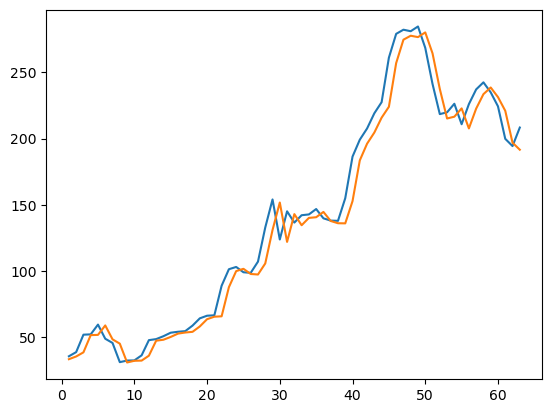

In [93]:
from sklearn.metrics import r2_score

X_test = X_test.drop(columns=['S&P 500 Variance', 'Tesla Wikipedia Page Views','Nissan Stock Price','Sentiment','Ford Stock Price','GM Stock Price'])
X_test=sm.add_constant(X_test)
print(X_test.head())
y_pred = lrm.predict(X_test)

# Assuming y_test and y_pred are the actual and predicted values, respectively
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

osr2=OSR2(lrm, y_train, X_test, y_test)
print("OSR2 Score:", osr2)

mean_absolute_error = np.mean(np.abs(y_test - y_pred))
mean_absolute_error_percentage = mean_absolute_error / np.mean(y_test)
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Absolute Error Percentage:", mean_absolute_error_percentage)

plt.plot(y_test)
plt.plot(y_pred)
plt.show()